# Exploratory Data Analysis

## Dependencies

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

## Reading data

In [22]:
PATH = '../data/historico_acoes_b3.csv'
df = pd.read_csv(PATH)

## Data inspection
display(df.head())

display(df.info())

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00+00:00,ALPA3.SA,0.345604,0.345604,0.345604,0.345604,0.233571,3.327500e+05
1,2000-01-03 00:00:00+00:00,BBAS3.SA,1.400000,1.426666,1.366666,1.366666,0.499397,1.029600e+06
2,2000-01-03 00:00:00+00:00,BBDC3.SA,2.096001,2.096001,2.013040,2.013040,1.052641,3.606480e+05
3,2000-01-03 00:00:00+00:00,BRAP3.SA,0.000167,0.000167,0.000167,0.000167,0.000035,3.496186e+08
4,2000-01-03 00:00:00+00:00,BRAP4.SA,3.500000,3.750000,3.500000,3.500000,0.824413,5.252000e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137369 entries, 0 to 2137368
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Ticker     object 
 2   Open       float64
 3   High       float64
 4   Low        float64
 5   Close      float64
 6   Adj Close  float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 130.5+ MB


None

## Data Preprocessing


In [23]:
# Rename columns
cols_rename = {
    'Date': 'date',
    'Ticker': 'ticker',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
}

# Apply column renaming
df.rename(columns=cols_rename, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# time columns
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

# Get unique tickers
tickers = df['ticker'].unique().tolist()

print(f"Number of unique tickers: {len(tickers)}")
print(f"First 5 tickers: {tickers[:5]}")

Number of unique tickers: 582
First 5 tickers: ['ALPA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BRAP3.SA', 'BRAP4.SA']


In [24]:
tickers

['ALPA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BRAP3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'CGRA4.SA',
 'CMIG3.SA',
 'CMIG4.SA',
 'COCE5.SA',
 'CPFE3.SA',
 'CPLE3.SA',
 'CPLE6.SA',
 'CSNA3.SA',
 'ABEV3.SA',
 'CGAS5.SA',
 'CCRO3.SA',
 'OIBR3.SA',
 'OIBR4.SA',
 'BRKM3.SA',
 'CSAN3.SA',
 'CSMG3.SA',
 'AGRO3.SA',
 'BEEF3.SA',
 'ABCB4.SA',
 'AMAR3.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'ALPA4.SA',
 'BBDC4.SA',
 'BRSR6.SA',
 'CEDO4.SA',
 'CIEL3.SA',
 'BRPR3.SA',
 'ADHM3.SA',
 'CEED3.SA',
 'APER3.SA',
 'ARZZ3.SA',
 'BPHA3.SA',
 'RAIL3.SA',
 'CTNM4.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ETER3.SA',
 'EUCA4.SA',
 'FESA4.SA',
 'GGBR3.SA',
 'GGBR4.SA',
 'GOAU3.SA',
 'GOAU4.SA',
 'ITSA3.SA',
 'ITSA4.SA',
 'ITUB3.SA',
 'TASA4.SA',
 'INEP3.SA',
 'ITUB4.SA',
 'GFSA3.SA',
 'GOLL4.SA',
 'GRND3.SA',
 'DASA3.SA',
 'JBSS3.SA',
 'EVEN3.SA',
 'FHER3.SA',
 'FRIO3.SA',
 'EZTC3.SA',
 'GSHP3.SA',
 'HBOR3.SA',
 'ELET6.SA',
 'ENGI4.SA',
 'EQTL3.SA',
 'HYPE3.SA',
 'YDUQ3.SA',
 'DIRR3.SA',
 'FLRY3.SA',
 'ECOR3.SA',

## Time-Series Analysis


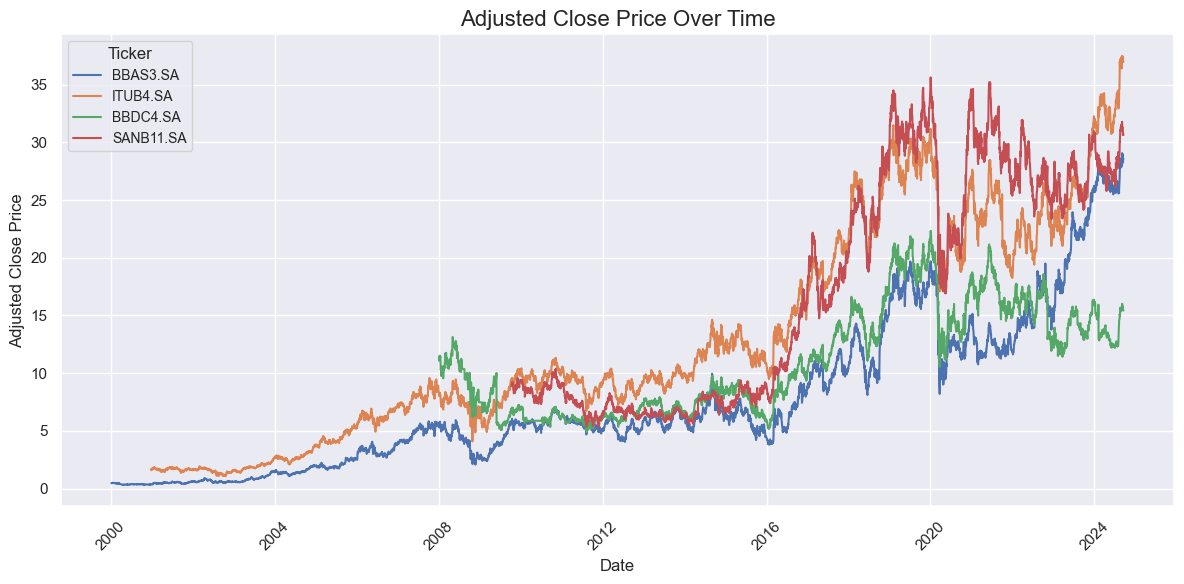

In [25]:
tickers_plot = ['BBAS3.SA', 'ITUB4.SA', 'BBDC4.SA', 'SANB11.SA']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the data for each ticker in tickers_plot
for ticker in tickers_plot:
    ticker_data = df[df['ticker'] == ticker]
    sns.lineplot(x=ticker_data.index, y='adj_close', data=ticker_data, label=ticker)

# Customize the plot
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend(title='Ticker', title_fontsize='12', fontsize='10')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


É possível observar que as ações dos principais bancos do brasil apresentam um comportamento muito similar ao longo do tempo. Eles possuem uma tendência de crescimento ao longo do tempo, com alguns picos e quedas, com maior queda no ano de 2020, provavelmente causada pela pandemia de COVID-19. 


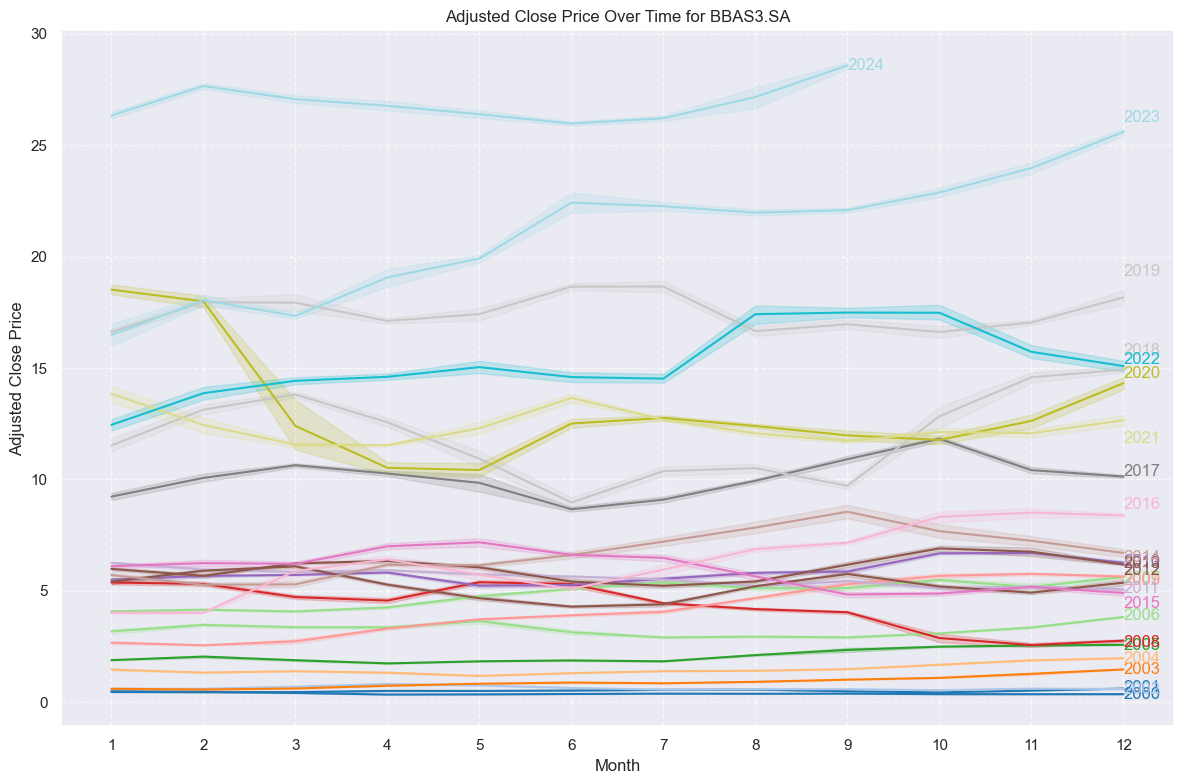

In [38]:
tickers_plot = ['BBAS3.SA']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot the data for each ticker in tickers_plot
for ticker in tickers_plot:
    ticker_data = df[df['ticker'] == ticker]
    
    # Get unique years and assign colors
    years = ticker_data['year'].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(years)))
    
    for year, color in zip(years, colors):
        year_data = ticker_data[ticker_data['year'] == year]
        line = sns.lineplot(x=year_data['month'], y=year_data['adj_close'], color=color, label=year)
        
        # Add value at the end of each line
        last_point = year_data.iloc[-1]
        plt.text(last_point['month'], last_point['adj_close'], 
                 f"{last_point['year']:.0f}", 
                 color=color, ha='left', va='center')

plt.title(f'Adjusted Close Price Over Time for {ticker}')
plt.xlabel('Month')
plt.ylabel('Adjusted Close Price')
plt.xticks(range(1, 13))  # Set x-ticks to months 1-12
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend().remove()


plt.tight_layout()
plt.show()

Não é possível identificar um padrão claro de sazonalidade nos dados.

<Figure size 1400x1000 with 0 Axes>

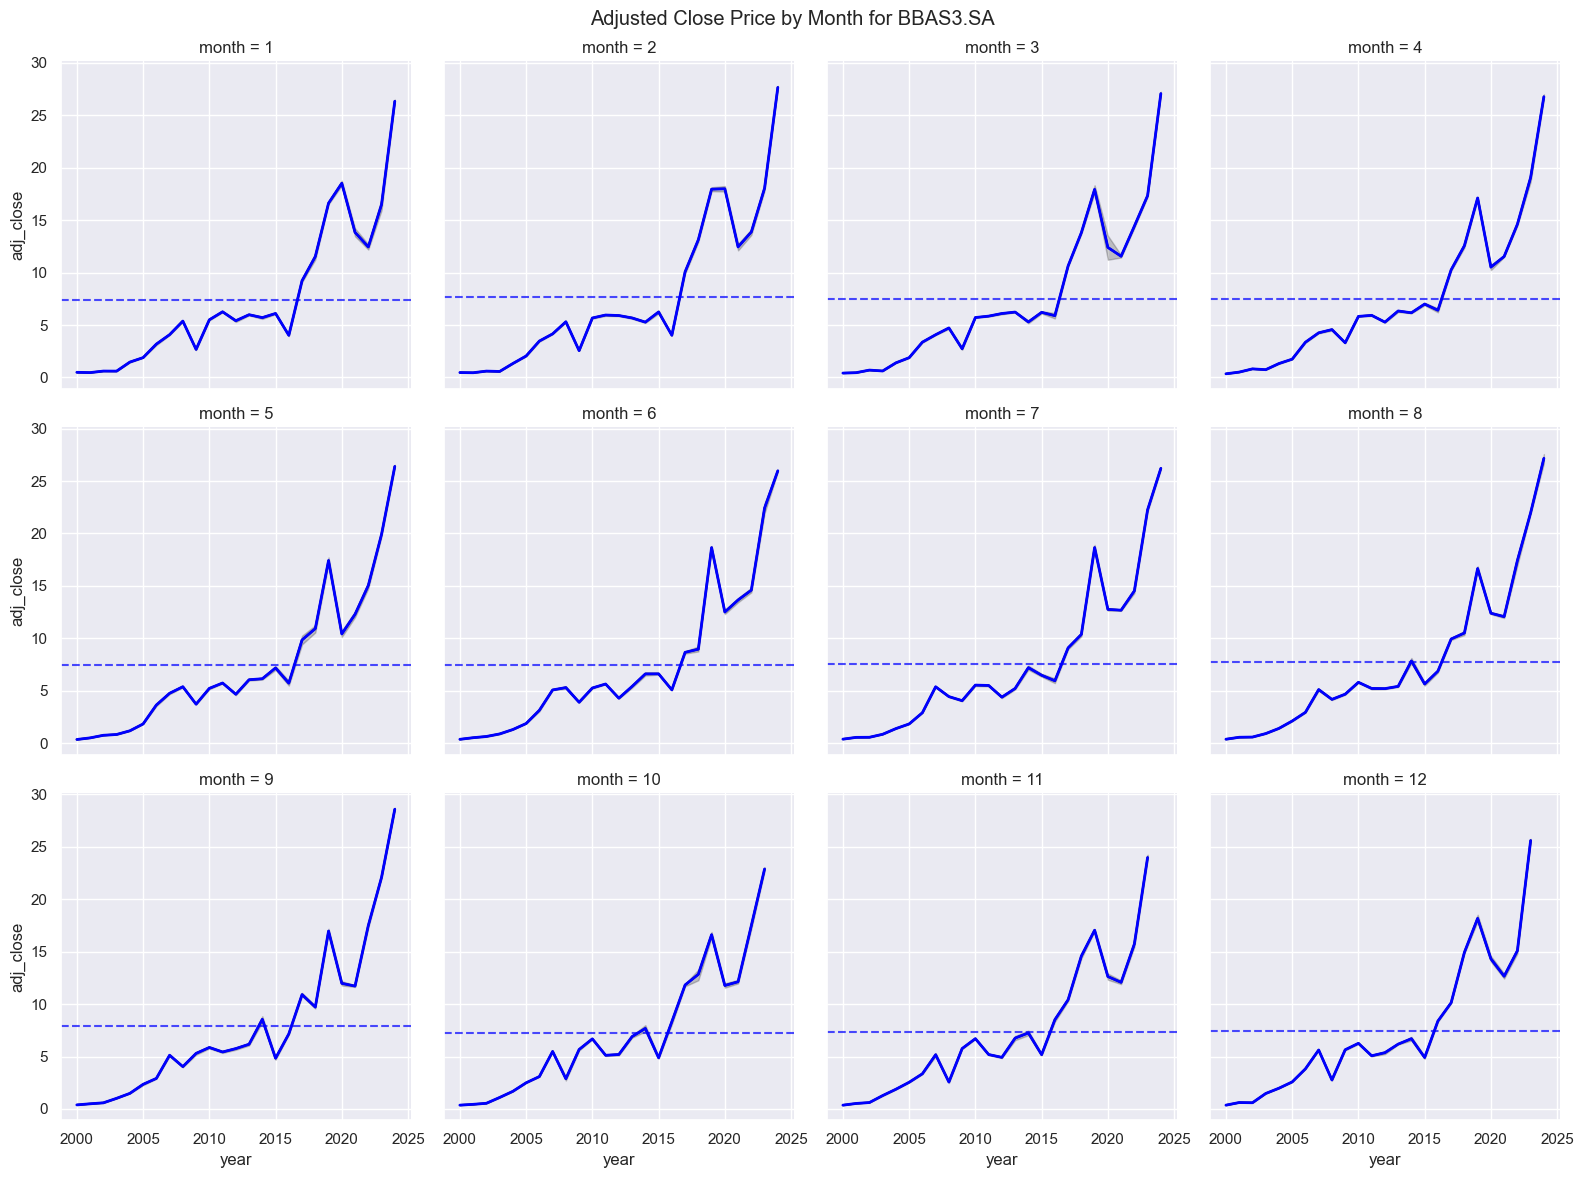

In [49]:
# Criar uma figura e eixos
plt.figure(figsize=(14, 10))

# Filtrar os dados para cada ticker em tickers_plot
for ticker in tickers_plot:
    ticker_data = df[df['ticker'] == ticker]

    # Plotar gráfico sazonal para cada mês separadamente (FacetGrid)
    g = sns.FacetGrid(ticker_data, col="month", col_wrap=4, height=4)
    g.map(sns.lineplot, "year", "adj_close", color="black")

    # Adicionar linha de tendência média para cada mês
    for ax in g.axes.flat:
        month = ax.get_title().split('=')[-1].strip()
        monthly_avg = ticker_data[ticker_data['month'] == int(month)].groupby('year')['adj_close'].mean()
        ax.plot(monthly_avg.index, monthly_avg.values, color='blue', lw=2)
        
        # Adicionar linha média azul
        mean_value = monthly_avg.mean()
        ax.axhline(y=mean_value, color='blue', linestyle='--', alpha=0.7)

# Ajustar o layout
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle(f'Adjusted Close Price by Month for {ticker}')

plt.tight_layout()

plt.show()